# import

In [10]:
import torchvision
from torchvision import datasets, models, transforms
import torch
import matplotlib.pyplot as plt
import os
import numpy as np

In [11]:
CLASS_NUM = 8
BATCH_SIZE = 32
MEAN=[0.485, 0.456, 0.406]
STD=[0.229, 0.224, 0.225]

DATA_DIR =  'tea_sickness_dataset/train_val_test'


#  Load Data and RandAugment

In [12]:

def load_data(IMAGE_SIZE_TRAIN=224, IMAGE_SIZE_VAL=224, MEAN=[0.485, 0.456, 0.406], STD=[0.229, 0.224, 0.225]):
    policy =  transforms.AutoAugmentPolicy.CIFAR10
    data_transforms = {
        'train':
        transforms.Compose([
            transforms.Resize([IMAGE_SIZE_TRAIN, IMAGE_SIZE_TRAIN]),
            transforms.RandAugment(num_ops= 2, magnitude = 13), 
            transforms.ToTensor(),
            transforms.Normalize(MEAN, STD)
        ]),
        'val':
        transforms.Compose([
            transforms.Resize([IMAGE_SIZE_VAL,  IMAGE_SIZE_VAL]),
            transforms.ToTensor(),
            transforms.Normalize(MEAN, STD)
        ]),
    }

    data_dir = DATA_DIR
    
    image_datasets = {
        x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
        for x in ['train', 'val']
    }

    dataloaders = {
        x: torch.utils.data.DataLoader(image_datasets[x],
                                       batch_size=BATCH_SIZE,
                                       shuffle=True,
                                       num_workers=4)
        for x in ['train', 'val']
    }
    
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
    class_names = image_datasets['train'].classes
    return dataloaders, dataset_sizes, class_names

In [13]:
dataloaders, dataset_sizes, class_names = load_data()

# Visualize a few images

torch.Size([3, 946, 1882])
(946, 1882, 3)
(946, 1882, 3)


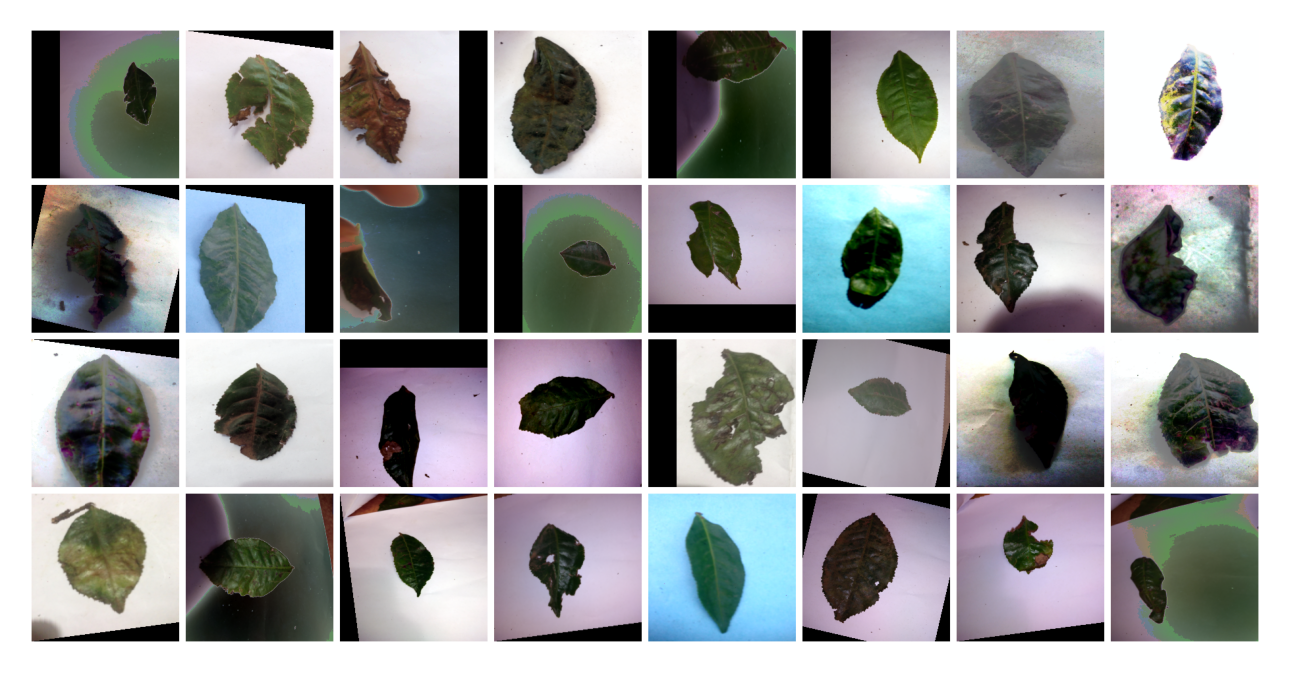

In [14]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    print(inp.shape)
    inp = inp.numpy().transpose((1, 2, 0))
    print(inp.shape)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(dpi=250)
    plt.axis('off')
    print(inp.shape)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
for i in range(3):
    next(iter(dataloaders['train']))
inputs, classes =next(iter(dataloaders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs, nrow=8, padding=10,pad_value = 10)

# imshow(out, title=[class_names[x] for x in classes])
imshow(out)